### Pyber Data Analysis
*Urban areas dominate the market with 80.9% of all drivers, 68.4% of total rides and 62.7% of total fares.

*We observe the highest fares in rural areas. With only 2.6% of total drivers they account for 6.8% of total fares.

*In all areas: as the driver count per city gets higher we observe average fares decrease.

In [2]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv(city_data_to_load)
city_data_to_load.head()

#ride_data_to_load
ride_data_to_load = pd.read_csv(ride_data_to_load)
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
merged_data = pd.merge(city_data_to_load, ride_data_to_load, on="city", how="inner")
sorted_city_data = merged_data.sort_values(["city"])
#sorted_city_data = sorted_city_data.set_index('city')
# Display the data table for preview
sorted_city_data.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


In [4]:
city_data = sorted_city_data.groupby("city")
Average_Fare_City = city_data["fare"].mean()
Average_Fare_Per_City = pd.DataFrame(Average_Fare_City)
Average_Fare_Per_City = Average_Fare_Per_City.rename(columns={'fare': 'Average Fare'})
Average_Fare_Per_City.head()

,Average Fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [5]:
Total_Fare_City = city_data["fare"].sum()
Total_Fare_Per_City = pd.DataFrame(Total_Fare_City)
Total_Fare_Per_City = Total_Fare_Per_City.rename(columns={'fare': 'Total Fare'})
Total_Fare_Per_City.head()

,Total Fare
city,
Amandaburgh,443.55
Barajasview,557.31
Barronchester,582.76
Bethanyland,593.21
Bradshawfurt,400.64


In [6]:
Total_Number_of_Rides_Per_City = city_data["ride_id"].count()
Total_Number_of_Rides_Per_City.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [7]:
Drivers_Per_City = city_data["driver_count"].value_counts()
Drivers_Per_City_df = pd.DataFrame(Drivers_Per_City)
Drivers_Per_City_df = Drivers_Per_City_df.rename(columns={"driver_count":"Total Number of rides"})
Drivers_Per_City_df = Drivers_Per_City_df.reset_index(level=["driver_count"])
Drivers_Per_City_df = Drivers_Per_City_df.rename(columns={"driver_count":"Driver Count per City"})
Drivers_Per_City_df.head()

,Driver Count per City,Total Number of rides
city,,
Amandaburgh,12,18
Barajasview,26,22
Barronchester,11,16
Bethanyland,22,18
Bradshawfurt,7,10


In [8]:
City_Type = city_data["type"].value_counts()
City_Type.head()

city           type    
Amandaburgh    Urban       18
Barajasview    Urban       22
Barronchester  Suburban    16
Bethanyland    Suburban    18
Bradshawfurt   Rural       10
Name: type, dtype: int64

In [9]:
City_Type_df = pd.DataFrame(City_Type)
City_Type_unstacked = City_Type_df.unstack(level="type")
City_Type_unstacked.columns = City_Type_unstacked.columns.droplevel()
City_Type_unstacked.head()

type,Rural,Suburban,Urban
city,,,
Amandaburgh,NaN,NaN,18.0
Barajasview,NaN,NaN,22.0
Barronchester,NaN,16.0,NaN
Bethanyland,NaN,18.0,NaN
Bradshawfurt,10.0,NaN,NaN


In [10]:
Rural_cities = pd.DataFrame(City_Type_unstacked["Rural"])
Suburban_cities = pd.DataFrame(City_Type_unstacked["Suburban"])
Urban_cities = pd.DataFrame(City_Type_unstacked["Urban"])

In [11]:
Rural_cities = Rural_cities.dropna()
Suburban_cities = Suburban_cities.dropna()
Urban_cities = Urban_cities.dropna()

In [12]:
merged_Rural_cities = pd.merge(Rural_cities, Average_Fare_Per_City, on="city", how="left")
merged_Rural_cities = pd.merge(merged_Rural_cities, Drivers_Per_City_df, on="city", how="left")
merged_Rural_cities = pd.merge(merged_Rural_cities, Total_Fare_Per_City, on="city", how="left")
merged_Rural_cities.head()

,Rural,Average Fare,Driver Count per City,Total Number of rides,Total Fare
city,,,,,
Bradshawfurt,10.0,40.064000,7,10,400.64
Garzaport,3.0,24.123333,7,3,72.37
Harringtonfort,6.0,33.470000,4,6,200.82
Jessicaport,6.0,36.013333,1,6,216.08
Lake Jamie,6.0,34.358333,4,6,206.15


In [13]:
merged_Suburban_cities = pd.merge(Suburban_cities, Average_Fare_Per_City, on="city", how="left")
merged_Suburban_cities = pd.merge(merged_Suburban_cities, Drivers_Per_City_df, on="city", how="left")
merged_Suburban_cities = pd.merge(merged_Suburban_cities, Total_Fare_Per_City, on="city", how="left")
merged_Suburban_cities.head()

,Suburban,Average Fare,Driver Count per City,Total Number of rides,Total Fare
city,,,,,
Barronchester,16.0,36.422500,11,16,582.76
Bethanyland,18.0,32.956111,22,18,593.21
Brandonfort,19.0,35.437368,10,19,673.31
Colemanland,22.0,30.894545,23,22,679.68
Davidfurt,17.0,31.995882,23,17,543.93


In [14]:
merged_Urban_cities = pd.merge(Urban_cities, Average_Fare_Per_City, on="city", how="left")
merged_Urban_cities = pd.merge(merged_Urban_cities, Drivers_Per_City_df, on="city", how="left")
merged_Urban_cities = pd.merge(merged_Urban_cities, Total_Fare_Per_City, on="city", how="left")
merged_Urban_cities.head()

,Urban,Average Fare,Driver Count per City,Total Number of rides,Total Fare
city,,,,,
Amandaburgh,18.0,24.641667,12,18,443.55
Barajasview,22.0,25.332273,26,22,557.31
Carriemouth,27.0,28.314444,52,27,764.49
Christopherfurt,27.0,24.501852,41,27,661.55
Deanville,19.0,25.842632,49,19,491.01


## Bubble Plot of Ride Sharing Data

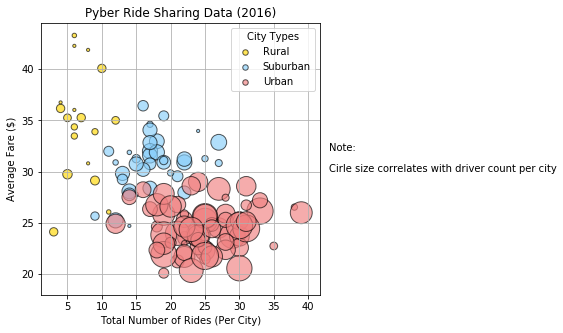

In [15]:
# Obtain the x and y coordinates for each of the three city types

x_Rural = merged_Rural_cities["Total Number of rides"]
x_Suburban = merged_Suburban_cities["Total Number of rides"]
x_Urban = merged_Urban_cities["Total Number of rides"]

y_Rural = merged_Rural_cities["Average Fare"]
y_Suburban = merged_Suburban_cities["Average Fare"]
y_Urban = merged_Urban_cities["Average Fare"]

Rural_Driver_Count_per_city = merged_Rural_cities["Driver Count per City"]
Suburban_Driver_Count_per_city = merged_Suburban_cities["Driver Count per City"]
Urban_Driver_Count_per_city = merged_Urban_cities["Driver Count per City"]

# Build the scatter plots for each city types

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#fig.suptitle("Pyber Ride Sharing Data (2016)", fontsize=16)

plt.scatter(x_Rural, y_Rural, marker="o", facecolors="gold", edgecolors="black", 
            s=Rural_Driver_Count_per_city*10, alpha=0.65, label="Rural")

plt.scatter(x_Suburban, y_Suburban, marker="o", facecolors="lightskyblue", edgecolors="black", 
            s=Suburban_Driver_Count_per_city*10, alpha=0.65, label="Suburban")

plt.scatter(x_Urban, y_Urban, marker="o", facecolors="lightcoral", edgecolors="black", 
            s=Urban_Driver_Count_per_city*10, alpha=0.65, label="Urban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Types", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])


# Incorporate a text label regarding circle size
plt.text(43, 32, "Note:") 
plt.text(43, 30, "Cirle size correlates with driver count per city")  

fig = plt.gcf()
fig.set_size_inches(5,5) 

# Save Figure
plt.savefig("Output/Pyber.png")

In [16]:
# Show plot
plt.show()

## Total Fares by City Type

In [17]:
# Calculate Type Percents
Total_Fare = sorted_city_data["fare"].sum(0)
Rural_Total_Fare_Percent = ((merged_Rural_cities["Total Fare"].sum()) / Total_Fare) * 100
Suburban_Total_Fare_Percent = ((merged_Suburban_cities["Total Fare"].sum()) / Total_Fare) * 100
Urban_Total_Fare_Percent = ((merged_Urban_cities["Total Fare"].sum()) / Total_Fare) * 100

In [18]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels= ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes_total_fare = [Rural_Total_Fare_Percent, Suburban_Total_Fare_Percent, Urban_Total_Fare_Percent]

# The colors of each section of the pie chart
colors= ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode= (0, 0, 0.1)

Text(0.5,0.9,'% of Total Fares by City Type')

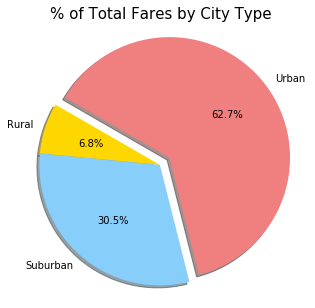

In [19]:
plt.pie(sizes_total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.figtext(.5,.9,"% of Total Fares by City Type", fontsize=15, ha='center')

In [20]:
# Save Figure
plt.savefig("Output/Total_Fares_by_City_Type.png")

<Figure size 432x288 with 0 Axes>

In [21]:
# Show Figure
plt.show()

## Total Rides by City Type

In [22]:
# Calculate Ride Percents
Total_Rides = sorted_city_data["type"].count()
Rural_Total_Rides_Percent = ((merged_Rural_cities["Total Number of rides"].sum()) / Total_Rides) * 100
Suburban_Total_Rides_Percent = ((merged_Suburban_cities["Total Number of rides"].sum()) / Total_Rides) * 100
Urban_Total_Rides_Percent = ((merged_Urban_cities["Total Number of rides"].sum()) / Total_Rides) * 100

In [23]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes_total_rides = [Rural_Total_Rides_Percent, Suburban_Total_Rides_Percent, Urban_Total_Rides_Percent]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

Text(0.5,0.9,'% of Total Rides by City Type')

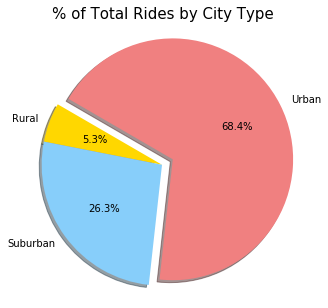

In [24]:
plt.pie(sizes_total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.figtext(.5,.9,"% of Total Rides by City Type", fontsize=15, ha='center')

In [25]:
# Save Figure
plt.savefig("Output/Total_Rides_by_City_Type.png")

<Figure size 432x288 with 0 Axes>

In [26]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [27]:
# Calculate Driver Percents
Total_Drivers = Drivers_Per_City_df["Driver Count per City"].sum(0)
Rural_Total_Drivers_Percent = ((merged_Rural_cities["Driver Count per City"].sum()) / Total_Drivers) * 100
Suburban_Total_Drivers_Percent = ((merged_Suburban_cities["Driver Count per City"].sum()) / Total_Drivers) * 100
Urban_Total_Drivers_Percent = ((merged_Urban_cities["Driver Count per City"].sum()) / Total_Drivers) * 100

In [32]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes_total_drivers = [Rural_Total_Drivers_Percent,Suburban_Total_Drivers_Percent,Urban_Total_Drivers_Percent]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

Text(0.5,0.9,'% of Total Drivers by City Type')

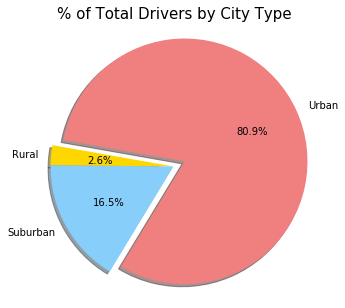

In [34]:
plt.pie(sizes_total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.figtext(.5,.9,"% of Total Drivers by City Type", fontsize=15, ha='center')

In [35]:
# Save Figure
plt.savefig("Output/Total_Drivers_by_City_Type.png")

<Figure size 432x288 with 0 Axes>

In [36]:
# Show Figure
plt.show()